In [4]:
import pandas as pd
import os

# Direct path to your folder
TRAIN_DIR = r"C:\Users\ishit\Downloads\widsdatathon2025\TRAIN_NEW"

# Load the Excel file correctly
targets_df = pd.read_excel(os.path.join(TRAIN_DIR, "TRAINING_SOLUTIONS.xlsx"))

# Show the first few rows
print(targets_df.head())


  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1


In [5]:
import pandas as pd

# Load the Excel file to check available sheets
file_path = r"C:\Users\ishit\Downloads\widsdatathon2025\TRAIN_NEW\TRAINING_SOLUTIONS.xlsx"
xls = pd.ExcelFile(file_path)

# Print sheet names to verify
print(xls.sheet_names)

# Load the sheet you're interested in (assuming it's the first one)
targets_df = pd.read_excel(file_path, sheet_name=0)

# Show the first few rows
print(targets_df.head())


['training_combined']
  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1


In [6]:
print(targets_df.info())  # Show basic info of the DataFrame
print(targets_df.columns)  # List all columns in the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB
None
Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')


In [7]:
try:
    targets_df = pd.read_excel(file_path)
    print(targets_df.head())  # Show first few rows
except Exception as e:
    print(f"Error loading Excel file: {e}")


  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1


In [8]:
# Check the first few rows of data
print(targets_df.head())

# Inspect the DataFrame's structure
print(targets_df.info())

# List the columns
print(targets_df.columns)


  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB
None
Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')


In [9]:
# Check for missing values
print(targets_df.isnull().sum())


participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64


In [11]:
print(targets_df.columns)


Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')


In [12]:

targets_df = pd.get_dummies(targets_df, columns=['Sex_F'], drop_first=True)

# Show the updated DataFrame
print(targets_df.head())


  participant_id  ADHD_Outcome  Sex_F_1
0   UmrK0vMLopoR             1     True
1   CPaeQkhcjg7d             1    False
2   Nb4EetVPm3gs             1    False
3   p4vPhVu91o4b             1     True
4   M09PXs7arQ5E             1     True


In [13]:
# Example of imputing missing values with the mode (most frequent value)
targets_df.fillna(targets_df.mode().iloc[0], inplace=True)


In [14]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the numeric columns
scaler = StandardScaler()
# Select only the numeric columns to scale
numeric_cols = targets_df.select_dtypes(include=['float64', 'int64']).columns
targets_df[numeric_cols] = scaler.fit_transform(targets_df[numeric_cols])

# Show the updated DataFrame
print(targets_df.head())


  participant_id  ADHD_Outcome  Sex_F_1
0   UmrK0vMLopoR      0.678002     True
1   CPaeQkhcjg7d      0.678002    False
2   Nb4EetVPm3gs      0.678002    False
3   p4vPhVu91o4b      0.678002     True
4   M09PXs7arQ5E      0.678002     True


In [17]:
# Print column names to check for any hidden characters or differences
print(targets_df.columns.tolist())



['participant_id', 'ADHD_Outcome', 'Sex_F_1']


In [18]:
# Update column names in the drop function to match the exact column names
X = targets_df.drop(columns=['ADHD_Outcome', 'Sex_F_1', 'participant_id'])  # Drop target and ID columns
y = targets_df[['ADHD_Outcome', 'Sex_F_1']]  # Target variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(X_train.shape, X_test.shape)


(970, 0) (243, 0)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model (Random Forest Classifier for example)
model = RandomForestClassifier(random_state=42)


In [22]:
print(X_train.shape)  # This should give you the shape of the training data
print(y_train.shape)  # This should give you the shape of the target data


(970, 0)
(970, 2)


In [23]:
print(targets_df.columns)  # Check all columns in your DataFrame


Index(['participant_id', 'ADHD_Outcome', 'Sex_F_1'], dtype='object')


In [24]:
print(targets_df.head())  # Before encoding
targets_df = pd.get_dummies(targets_df, drop_first=True)  # Apply encoding
print(targets_df.head())  # After encoding


  participant_id  ADHD_Outcome  Sex_F_1
0   UmrK0vMLopoR      0.678002     True
1   CPaeQkhcjg7d      0.678002    False
2   Nb4EetVPm3gs      0.678002    False
3   p4vPhVu91o4b      0.678002     True
4   M09PXs7arQ5E      0.678002     True
   ADHD_Outcome  Sex_F_1  participant_id_00fV0OyyoLfw  \
0      0.678002     True                        False   
1      0.678002    False                        False   
2      0.678002    False                        False   
3      0.678002     True                        False   
4      0.678002     True                        False   

   participant_id_04X1eiS79T4B  participant_id_05ocQutkURd6  \
0                        False                        False   
1                        False                        False   
2                        False                        False   
3                        False                        False   
4                        False                        False   

   participant_id_06YUNBA9ZRLq  partic

In [26]:
# Drop all participant_id columns by filtering based on column names
X = targets_df.drop(columns=[col for col in targets_df.columns if col.startswith('participant_id') or col == 'ADHD_Outcome'])

# Set the target variable
y = targets_df['ADHD_Outcome']



In [29]:
print(targets_df.columns)


Index(['ADHD_Outcome', 'Sex_F_1', 'participant_id_00fV0OyyoLfw',
       'participant_id_04X1eiS79T4B', 'participant_id_05ocQutkURd6',
       'participant_id_06YUNBA9ZRLq', 'participant_id_0FUWCjn9YMN1',
       'participant_id_0Hthz5IFXhpw', 'participant_id_0JhQVAT7btJ5',
       'participant_id_0N8sQwUgUPEj',
       ...
       'participant_id_zW62ObiZfmKJ', 'participant_id_zWzLCi3NTBTd',
       'participant_id_zeR6IKf0gn1Z', 'participant_id_zlT4AqBGFiGv',
       'participant_id_zmxGvIrOD0bt', 'participant_id_zpU7rEseBMH8',
       'participant_id_zpr8w4jCfVPe', 'participant_id_zwBG0rZ05Mcb',
       'participant_id_zwXD5v17Rx01', 'participant_id_zwjJWCRzKhDz'],
      dtype='object', length=1214)


In [30]:
X = targets_df.drop(columns=[col for col in targets_df.columns if col.startswith('participant_id')])


In [35]:
print(X_train.shape)
print(y_train.shape)


(970, 1)
(970,)


In [36]:
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
X_train_subset = X_train[:1000]  # for example, first 1000 rows
y_train_subset = y_train[:1000]
model.fit(X_train_subset, y_train_subset)


RandomForestRegressor(random_state=42)

In [38]:
try:
    model.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred: {e}")


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Set target
y = targets_df['ADHD_Outcome']

# Drop participant_id columns
X = targets_df.drop(columns=[col for col in targets_df.columns if col.startswith('participant_id') or col == 'ADHD_Outcome'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# MSE
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.8989293124794931


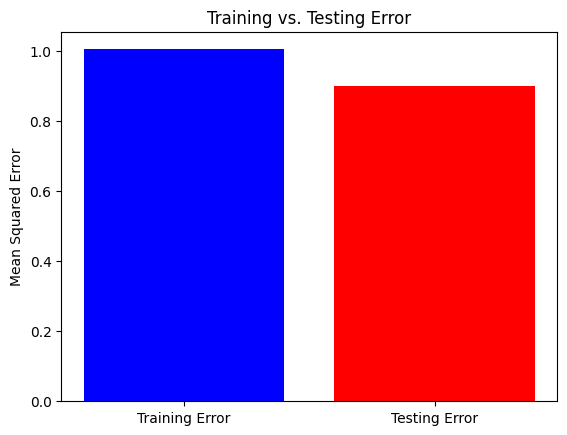

In [42]:
# Calculate errors for training and test sets
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, y_pred)

# Create a bar chart for training vs. testing error
errors = [train_error, test_error]
labels = ['Training Error', 'Testing Error']

plt.bar(labels, errors, color=['blue', 'red'])
plt.title('Training vs. Testing Error')
plt.ylabel('Mean Squared Error')
plt.show()
